### Day 1

Introduction to Regression

In [1]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
style.use ('ggplot')
import pickle
import random

In [2]:
df = quandl.get('WIKI/GOOGL')

In [3]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [4]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [5]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/df['Adj. Close'] * 100.0

In [6]:
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open'])/df['Adj. Open'] * 100.0

In [7]:
df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

In [8]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


### Day 2

In [9]:
forecast_col = 'Adj. Close'

In [10]:
df.fillna(-99999, inplace = True)

In [11]:
forecast_out = int(math.ceil(0.1*len(df))) #math.ceil rounds up to the nearest whole number

we've got features already in the 7th line, so we would create our label

In [12]:
df['label'] = df[forecast_col].shift(-forecast_out) #this shifts the columns negatively, like shifts the column up
#this way the label column for eac row would be the adjusted close price 10 days into the future

features are the attributes of what may cause the adjust close price in 10 days to change 

In [13]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,214.005615
2004-08-20,54.322689,0.710922,7.227007,22834300.0,210.725489
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,208.072299
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,218.288837
2004-08-25,53.164113,1.886792,1.183658,9188600.0,223.309335


In [14]:
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2018-03-21,1094.00,1.343693,0.130884,1990515.0,NaN
2018-03-22,1053.15,2.921711,-2.487014,3418154.0,NaN
2018-03-23,1026.55,3.918952,-2.360729,2413517.0,NaN
2018-03-26,1054.09,0.491419,0.332191,3272409.0,NaN
2018-03-27,1006.94,5.720301,-5.353887,2940957.0,NaN


### Day 3

In [15]:
X = np.array(df.drop(['label', 'Adj. Close'],1)) #this is our feature or our test

In [16]:
#scaling X

X = preprocessing.scale(X)

In [17]:
X_lately = X [-forecast_out:] #x_lately is what we are trying to predict against

In [18]:
X = X[:-forecast_out]

In [19]:
df.dropna(inplace = True)

In [20]:
y = np.array(df['label'])  #this is our label or our train

### Day 4

In [21]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)

In [22]:
clf = LinearRegression(n_jobs = 10)

In [23]:
clf.fit(X_train, y_train) #train

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [24]:
with open ('linearregression.pickle','wb') as f:
    pickle.dump (clf, f) #this means to dump our trained classifier (clf) into 'f'

In [25]:
pickle_in = open ('linearregression.pickle','rb') #to use the classifier
clf = pickle.load(pickle_in) #load pickle in

In [26]:
accuracy = clf.score(X_test, y_test) #test

you would want to train and test on separate data because if you train a classifier on the same data that you test against, it would give an error because it has already seen the information

In [27]:
accuracy

0.30241295870594254

### Day 5

In [28]:
forecast_set = clf.predict(X_lately)

In [29]:
print (forecast_set, accuracy, forecast_out)

[514.27231184 516.19236484 525.31445873 541.83606802 546.10401072
 544.88095655 544.49241206 549.66966857 551.06010741 560.01529184
 533.71018441 546.82976754 537.46180016 527.82883509 544.25156593
 543.7231274  544.49889768 538.22475619 545.10311695 540.04557016
 544.77245118 538.6551994  542.90903504 543.43120329 530.6686973
 550.55526011 549.57472661 546.96887297 551.70377833 557.92552392
 555.64140157 552.07779602 553.33582286 544.49843187 539.91068343
 546.86733494 548.58515848 539.26702055 547.95531076 551.17606614
 548.44714206 548.16208086 549.88428755 547.06804001 553.04828629
 554.51518653 548.77789309 531.74505526 543.30864188 543.38229854
 515.42761786 515.96712264 517.21956745 538.30281705 535.87675839
 544.69969368 546.68840965 548.10117154 543.95984392 549.85807138
 550.73156425 547.63599254 549.59524665 548.23043275 548.95761653
 553.61500697 546.56082329 550.1720783  550.72426172 547.73248611
 548.06447315 553.74171474 548.31570199 541.2377364  550.92031308
 553.715250

In [30]:
df['Forecast'] = np.nan

In [31]:
last_date = df.iloc[-1].name

In [32]:
last_unix = last_date.timestamp()

In [33]:
one_day = 86400

In [34]:
next_unix = last_unix + one_day

iterating through the forecast set taking each forecast and day, setting them as the values in the dataframe and making the future features Not a number (Nan)

In [35]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i] #this sets all the first columns to Nan

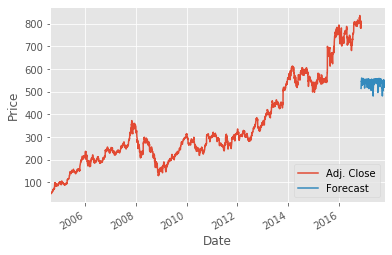

In [36]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Blue line is the predicton line, it includes weekends and holidays.

Redline is the stock price, its just monday to friday

### Day 6

Pickling and Scaling

Pickle is serialization of any python object, it could be a dictionary, classifier or a whole host of other things
it's like a file, you can open it, save it and then read it when you want to use it.

The purpose of saving a classifier is to avoid doing the training step, because it takes a lot of time. When you save it, you might want to retrain it once a month but you don't have to train it everytime you want to use it.

You can scale linearregression very well


### Day 7

How Regression works

In the case where you don't have a relationship between X and y, linear regression is not beneficial.
The equation of a line is y=mx+b.

m is the slope of the line.

b is the y intercept

### Day 8
Creating a simple linear regression algorithm from scratch in python.

In [37]:
from statistics import mean

In [38]:
xs = np.array([1,2,3,4,5,6], dtype = np.float64)
ys = np.array([5,4,6,5,6,7], dtype = np.float64)

In [39]:
def best_fit_slope (xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys))/
        ((mean(xs)*mean(xs)) - mean(xs**2)))
    return m
m = best_fit_slope (xs,ys)

print(m)

0.42857142857142866


### Day 9

In [40]:
#We need to calculate the y-intercept of the best fit line

#b = mean(y) - mean(x)

def best_fit_slope_and_intercept (xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys))/
        ((mean(xs)*mean(xs)) - mean(xs**2)))
    
    b = mean(ys) - m*mean(xs)
    
    return m,b
m,b = best_fit_slope_and_intercept (xs,ys)

print(m,b)

0.42857142857142866 4.0


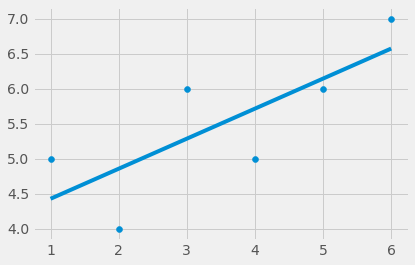

In [41]:
#to create a line that fits the data we have here, we have 'm' and 'b', so we need to make a list of 'ys'

style.use('fivethirtyeight')


regression_line = [(m*x)+b for x in xs]

plt.scatter(xs,ys)
plt.plot(xs, regression_line)
plt.show()

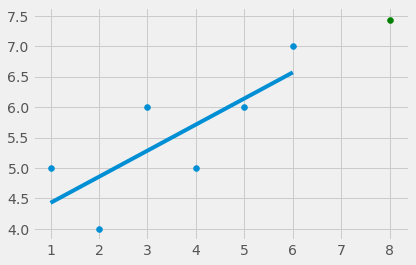

In [42]:
#using our model of 'm' and 'b', we could make a prediction based on the data.


predict_x = 8
predict_y = (m*predict_x)+b

plt.scatter(xs,ys)
plt.scatter(predict_x,predict_y, color = 'g')
plt.plot(xs, regression_line)
plt.show()

we can calculate how accurate the best fit line is and when you do that, you have a model might have a prediction which might have a certain accuracy and confidence to it as well

### Day 10

R squared theory

We determine accuracy or how good a fit our best fit line is through R squared or the coefficient of determination.

The coefficient of determination is calculated using squared error.

The way we calculate the squared error is that we say the error is the distance between the point and the best fit line, we also square the value of the error, the reason why we quare is because we want to only deal with positive values.

We only want to do linear regression on linear data, so we square the error because we want to penalize for outliers.



Calculating the coefficient of determination: 

r^2 = 1 - SE y^ / SE y`

where:

r^2 = r squared or coefficient of determination

SE = squared error

y^ = y hat or y hat line or best fit line or regression line

y` = mean of y


Here, you are trying to compare the accuracy of the mean of y to the accuracy of the best fit line.

Best fit line or regression line should be better than the mean of y

### Day 11

Calculating the r squared value

0.5844155844155845


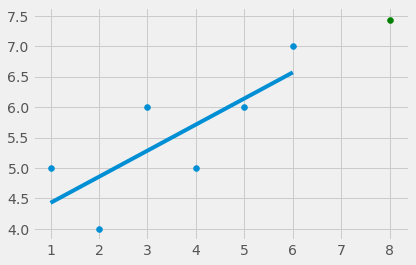

In [43]:
def squared_error (ys_orig, ys_line):
    return sum ((ys_line - ys_orig)**2)

def coefficient_of_determination (ys_orig, ys_line):
    y_mean_line = [mean (ys_orig) for y in ys_orig]
    squared_error_regression_line = squared_error (ys_orig, ys_line)
    squared_error_y_mean = squared_error (ys_orig, y_mean_line)
    return 1 - (squared_error_regression_line / squared_error_y_mean)
    
m,b = best_fit_slope_and_intercept (xs,ys)

regression_line = [(m*x)+b for x in xs]

predict_x = 8
predict_y = (m*predict_x)+b

r_squared = coefficient_of_determination (ys, regression_line)
print (r_squared)

plt.scatter(xs,ys)
plt.scatter(predict_x,predict_y, color = 'g')
plt.plot(xs, regression_line)
plt.show()


### Day 12

Testing our assumptions

0.33105689103176394


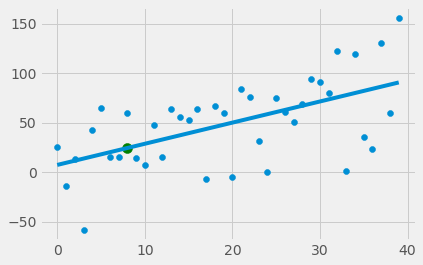

In [44]:
# xs = np.array([1,2,3,4,5,6], dtype = np.float64)
# ys = np.array([5,4,6,5,6,7], dtype = np.float64)

def create_dataset (hm, variance, step = 2, correlation = False):
    val = 1
    ys = []
    for i in range (hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        if correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype = np.float64), np.array(ys, dtype = np.float64)

def best_fit_slope_and_intercept (xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys))/
        ((mean(xs)*mean(xs)) - mean(xs**2)))
    
    b = mean(ys) - m*mean(xs)
    
    return m,b

def squared_error (ys_orig, ys_line):
    return sum ((ys_line - ys_orig)**2)

def coefficient_of_determination (ys_orig, ys_line):
    y_mean_line = [mean (ys_orig) for y in ys_orig]
    squared_error_regression_line = squared_error (ys_orig, ys_line)
    squared_error_y_mean = squared_error (ys_orig, y_mean_line)
    return 1 - (squared_error_regression_line / squared_error_y_mean)

xs, ys = create_dataset (40, 80, 2, correlation = 'pos')
    
m,b = best_fit_slope_and_intercept (xs,ys)

regression_line = [(m*x)+b for x in xs]

predict_x = 8
predict_y = (m*predict_x)+b

r_squared = coefficient_of_determination (ys, regression_line)
print (r_squared)

plt.scatter(xs,ys)
plt.plot(xs, regression_line)
plt.scatter(predict_x,predict_y, s=100, color = 'g')
plt.show()

### Day 13

You recall that with linear regression the objective was to create a model that best fits our data.

With classification, the idea is to create a model that best divides or separates our data.

With classification, you know that there are two classes of the data, the objective is to create a model that fits both data, like a model that defines the different classes.

With nearest neighbours, you are just checking to see who are the closest points to the outlier on the data.

With K nearest neighbours, you decide what the number of k is going to be. Example, if k = 2, you would find the 2 closest neighbours to k. In general, k should be equal to an odd number, say 3.

So if you had 3 groups, you would need a k = 5 to avoid any sort of split vote.

With k nearest neighbours, you don't just get only classification, you get an accuracy in the model i.e you can train and test a model for its level of accuracy, but each point can also have a degree of confidence

Downfalls with K nearest neighbours:

In order to find out who the nearest neighbours are, eucladian distance is used to measure the distance.

To find the euclidian distance, the simple method is to find the distance between any given points and all of the other points and then you say what are the closest 3 or 5 according to what k is.

On a huge dataset, this might be a long and tedious operation, and you would find out that the larger the dataset, the worse this algorithm runs because it's not as efficient as other algorithms. Also, with K nearest neighbours, the training and testing is basically the same thing or on the same spot. The scaling in k nearest neighbour is not so good

#### Day 14